In [1]:
import numpy as np

# simulasi lempar dadu 10.000 kali
rolls = np.random.randint(1, 7, size = 10000)

# peluang muncul angka genap
p_even = np.sum(rolls % 2 == 0) / len(rolls)

# peluang muncul angka lebih dari 4
p_greater4 = np.sum(rolls > 4) / len(rolls)

print("Peluang angka genap:", round(p_even, 2))
print("Peluang angka > 4:", round(p_greater4, 2))

Peluang angka genap: 0.5
Peluang angka > 4: 0.33


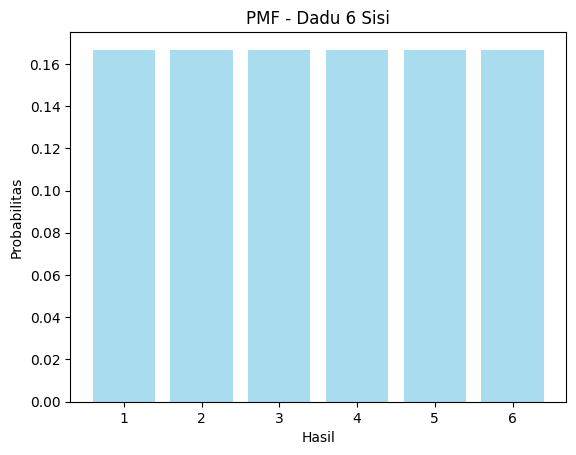

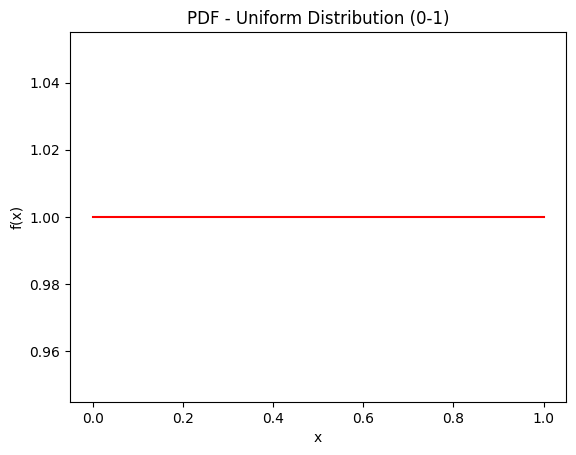

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# PMF
outcomes = np.arange(1, 7)
prob = np.ones(6) / 6
plt.bar(outcomes, prob, color='skyblue', alpha=0.7)
plt.title("PMF - Dadu 6 Sisi")
plt.xlabel("Hasil")
plt.ylabel("Probabilitas")
plt.show()

# PDF
x = np.linspace(0, 1, 100)
pdf = uniform.pdf(x, loc=0, scale=1)
plt.plot(x, pdf, color='red')
plt.title("PDF - Uniform Distribution (0-1)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [3]:
import numpy as np
from scipy.stats import t

# data 
data = [12, 14, 15, 16, 17, 18, 19]

# hitung mean, std, dan panjang data
mean = np.mean(data)
std = np.std(data)
n = len(data)

# tampilkan mean, std, dan panjang data
print("Data Sample :", data)
print("Mean :", mean)
print("Standar Deviasi :", std)

# hitung t_score dengan nilai CI 95%
t_score = t.ppf(0.975, df=n-1)

# margin erorr
margin_error = t_score * std / np.sqrt(n)

# CI
CI = (mean - margin_error, mean + margin_error)

print("95% Confidence Interval:", (round(CI[0], 2), round(CI[1], 2)))

Data Sample : [12, 14, 15, 16, 17, 18, 19]
Mean : 15.857142857142858
Standar Deviasi : 2.231499907401901
95% Confidence Interval: (np.float64(13.79), np.float64(17.92))


In [4]:
import numpy as np 
from scipy.stats import norm

# Buat 100 data acak normal dengan rata-rata 50 dan deviasi 10
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)

# Hitung mean, std, dan ukuran data
mean = np.mean(data)
std = np.std(data)
n = len(data)

# Cari nilai Z (1.96 untuk 95% CI)
z_score = norm.ppf(0.975)

# Margin of Error dan CI
margin_error = z_score * std / np.sqrt(n)
CI = (mean - margin_error, mean + margin_error)
print("Sample Mean:", round(mean, 2))
print("95% Confidence Interval:", (round(CI[0], 2), round(CI[1], 2)))

Sample Mean: 48.96
95% Confidence Interval: (np.float64(47.19), np.float64(50.73))


In [5]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# data
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)

# Ambil 30 sampel acak dari kolom sepal_length
sample = df['sepal_length'].sample(30, random_state=42)

# Hitung mean, std, dan ukuran data
mean = np.mean(sample)
std = np.std(sample)
n = len(sample)

# hitung z-score 
z_score = norm.ppf(0.975)

# margin error dan CI
margin_error = z_score * std / np.sqrt(n)
CI = (mean - margin_error, mean + margin_error)

print("Sample Mean:", round(mean, 2))
print("95% Confidence Interval:", (round(CI[0], 2), round(CI[1], 2)))


Sample Mean: 5.98
95% Confidence Interval: (np.float64(5.68), np.float64(6.28))


In [6]:
import numpy as np
from scipy.stats import ttest_1samp

data = np.array([12, 14, 15, 16, 17, 18, 19])

# hipothesis mean = 15
population_mean = 15

# hitung t-statistic dan p value
t_stat, p_value = ttest_1samp(data, population_mean)

print("T-statistic:", t_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value <= alpha:
    print("🔥 Kesimpulan: Kita MENOLAK hipotesis awal (H0).")
    print("➡ Artinya: Rata-rata data *tidak sama* dengan 15.")
else:
    print("👌 Kesimpulan: Kita TIDAK punya cukup bukti untuk menolak H0.")
    print("➡ Artinya: Tidak terbukti bahwa rata-rata data berbeda dari 15.")
    print("   (Bukan berarti mean pasti 15, hanya saja datanya kurang kuat.)")

T-statistic: 0.9408750722807707
P-value: 0.383088241586687
👌 Kesimpulan: Kita TIDAK punya cukup bukti untuk menolak H0.
➡ Artinya: Tidak terbukti bahwa rata-rata data berbeda dari 15.
   (Bukan berarti mean pasti 15, hanya saja datanya kurang kuat.)


In [7]:
import numpy as np
from scipy.stats import ttest_ind

data1 = np.array([12, 14, 15, 16, 17, 18, 19])
data2 = np.array([11, 13, 14, 15, 16, 17, 18])

# h0 = mean group 1 = mean group 2
# h1 = mean grop 1 != mean group 2
t_stat, p_value = ttest_ind(data1, data2)
print("T-stat:", t_stat)
print("P-value:", p_value)

if p_value <= 0.05:
    print("Reject H0 → Dua kelompok berbeda.")
else:
    print("Fail to Reject H0 → Tidak ada perbedaan signifikan.")

T-stat: 0.7761823345023016
P-value: 0.45266873983452593
Fail to Reject H0 → Tidak ada perbedaan signifikan.


In [8]:
import numpy as np
from scipy.stats import chi2_contingency

tabel = np.array([
    [20, 10, 5],
    [25, 12, 8]
])

chi2, p, dof, expected = chi2_contingency(tabel)

print("Chi-Square:", chi2)
print("P-Value:", p)

alpha = 0.05
if p <= alpha:
    print("🔥 Kesimpulan: Ada hubungan antara gender dan metode belajar.")
else:
    print("👌 Kesimpulan: Tidak ada hubungan antara gender dan metode belajar.")

Chi-Square: 0.1825335158668492
P-Value: 0.9127741886637144
👌 Kesimpulan: Tidak ada hubungan antara gender dan metode belajar.


In [9]:
from scipy.stats import f_oneway

video = [85, 88, 90, 78, 92, 80]
modul = [70, 75, 68, 72, 74, 77]
tutor = [88, 90, 91, 89, 87, 92]

F_stat, p_value = f_oneway(video, modul, tutor)

print("F-Statistic:", F_stat)
print("P-Value:", p_value)

alpha = 0.05
if p_value <= alpha:
    print("🔥 Kesimpulan: Ada perbedaan nilai dari ketiga metode.")
else:
    print("👌 Kesimpulan: Tidak ada bukti bahwa rata-rata 3 metode berbeda.")


F-Statistic: 30.485401459854042
P-Value: 5.197973606078048e-06
🔥 Kesimpulan: Ada perbedaan nilai dari ketiga metode.


In [12]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, spearmanr

x = np.array([1,2,3,4,5])
y = np.array([2,4,5,8,10])

# hitung pearson dan spearman
r_pearson, p_pearson = pearsonr(x, y)
r_spearman, p_spearman = spearmanr(x, y)

# Interpretation helper
def interpret(r):
    mag = abs(r)
    if mag >= 0.8: return "very strong"
    if mag >= 0.6: return "strong"
    if mag >= 0.4: return "moderate"
    if mag >= 0.2: return "weak"
    return "very weak"

print("Interpretation (synthetic):")
print(f"Pearson: {interpret(r_pearson)} {'positive' if r_pearson>0 else 'negative' if r_pearson<0 else 'no'} correlation")
print(f"Spearman: {interpret(r_spearman)} {'positive' if r_spearman>0 else 'negative' if r_spearman<0 else 'no'} correlation\n")

Interpretation (synthetic):
Pearson: very strong positive correlation
Spearman: very strong positive correlation



Linear Regression Results:
Slope (b1): 2.9080
Intercept (b0): 5.4302
R-squared: 0.9583


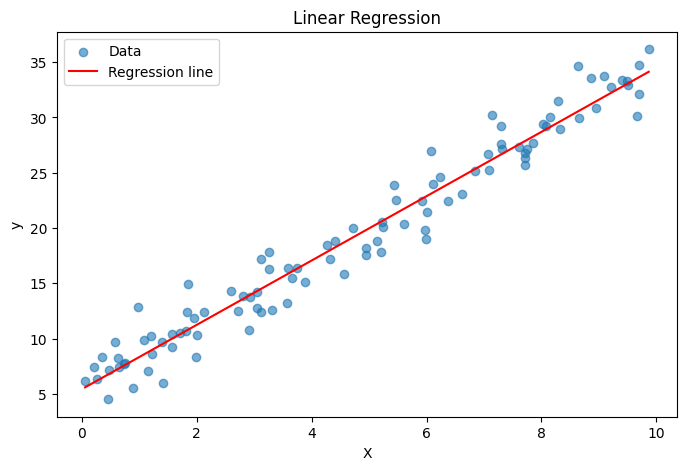

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)
X = np.random.rand(100, 1) * 10           # fitur X
true_slope = 3.0
true_intercept = 5.0
noise = np.random.randn(100, 1) * 2.0     # noise
y = true_intercept + true_slope * X + noise

model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0,0]
intercept = model.intercept_[0]
r2 = model.score(X, y)

print("Linear Regression Results:")
print(f"Slope (b1): {slope:.4f}")
print(f"Intercept (b0): {intercept:.4f}")
print(f"R-squared: {r2:.4f}")

# --- Visualize ---
plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha=0.6, label='Data')
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

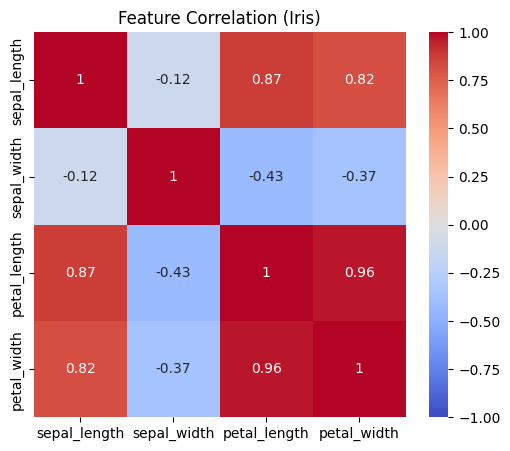


Correlation matrix:
               sepal_length  sepal_width  petal_length  petal_width
sepal_length         1.000       -0.118         0.872        0.818
sepal_width         -0.118        1.000        -0.428       -0.366
petal_length         0.872       -0.428         1.000        0.963
petal_width          0.818       -0.366         0.963        1.000


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')
df = iris.drop(columns=['species'])
corr = df.corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation (Iris)')
plt.show()

print("\nCorrelation matrix:\n", corr.round(3))
